Importing Dependencies


In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBRegressor



Importing Data Collection

In [2]:
#loading the data from csv file to a Pandas DataFrame
dataset = pd.read_csv(r"C:\Users\Gigabyte\Desktop\medicalmalpractice.csv")
#first 5 rows of dataframe
dataset.head()

,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
0,57041,7,62,1,2,Family Practice,Private,Male
1,324976,6,38,1,2,OBGYN,No Insurance,Female
2,135383,4,34,1,2,Cardiology,Unknown,Male
3,829742,7,42,1,1,Pediatrics,No Insurance,Female
4,197675,3,60,0,2,OBGYN,Medicare/Medicaid,Female


In [3]:
#determining the number of rows and columns in dataset
dataset.shape

(79210, 8)

In [4]:
#getting informations about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79210 entries, 0 to 79209
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Amount            79210 non-null  int64 
 1   Severity          79210 non-null  int64 
 2   Age               79210 non-null  int64 
 3   Private Attorney  79210 non-null  int64 
 4   Marital Status    79210 non-null  int64 
 5   Specialty         79210 non-null  object
 6   Insurance         79210 non-null  object
 7   Gender            79210 non-null  object
dtypes: int64(5), object(3)
memory usage: 4.8+ MB


Categorical Features: 

-Specialty         
-Insurance         
-Gender            

In [5]:
#checking for missing values 
dataset.isnull().sum()

Amount              0
Severity            0
Age                 0
Private Attorney    0
Marital Status      0
Specialty           0
Insurance           0
Gender              0
dtype: int64

Data Analysis


In [6]:
#statistical measures of the dataset
dataset.describe()

,Amount,Severity,Age,Private Attorney,Marital Status
count,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000
mean,157484.554816,4.799659,42.701868,0.660889,1.889559
std,193135.093293,2.083439,19.811063,0.473411,1.002502
min,1576.000000,1.000000,0.000000,0.000000,0.000000
25%,43670.250000,3.000000,28.000000,0.000000,1.000000
50%,98131.000000,4.000000,43.000000,1.000000,2.000000
75%,154675.250000,7.000000,58.000000,1.000000,2.000000
max,926411.000000,9.000000,87.000000,1.000000,4.000000


In [7]:
#Specialty  Column Analysis
print(dataset["Specialty"].value_counts(normalize=True)*100)
#number of differente specialtites
dataset["Specialty"].value_counts().count()


Specialty
Family Practice           14.437571
General Surgery           11.882338
OBGYN                     11.205656
Anesthesiology            11.023861
Orthopedic Surgery         9.180659
Internal Medicine          6.593864
Neurology/Neurosurgery     5.980306
Emergency Medicine         5.903295
Ophthamology               4.152254
Cardiology                 3.356899
Urological Surgery         2.559020
Resident                   2.503472
Radiology                  2.498422
Pediatrics                 1.787653
Dermatology                1.747254
Plastic Surgeon            1.722005
Occupational Medicine      0.915288
Pathology                  0.901401
Thoracic Surgery           0.838278
Physical Medicine          0.810504
Name: proportion, dtype: float64


np.int64(20)

In [8]:

#Insurances Column Analysis
print(dataset["Insurance"].value_counts(),"\n")

#number of distinct categories
print(dataset["Insurance"].value_counts().count())
df_filtered = dataset

Insurance
Private                 34289
Unknown                 24052
Medicare/Medicaid       10882
No Insurance             8002
Workers Compensation     1985
Name: count, dtype: int64 

5


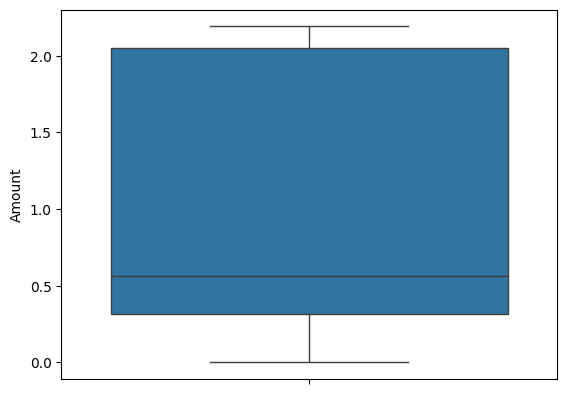

In [9]:

#df_filtered = df_filtered[(df_filtered['Amount'] >= 1576) & (df_filtered['Amount'] <=20000)]

#df_filtered.drop(df_filtered[df_filtered.Amount > 154675.25].index, inplace=True)
#df_filtered['Amount'] = np.sqrt(df_filtered['Amount'] + 1) 
from scipy.stats import boxcox, yeojohnson
# df_filtered["Amount"], _ = yeojohnson(df_filtered["Amount"])

from sklearn.preprocessing import RobustScaler


# Assuming df_filtered is your DataFrame and 'Amount' is the column you want to scale
# Assuming df is your DataFrame and 'Amount' is the column with outliers
# Q1 = df_filtered['Amount'].quantile(0.25)
# Q3 = df_filtered['Amount'].quantile(0.75)
# IQR = Q3 - Q1

# # Identify outliers
# outliers = df_filtered[(df_filtered['Amount'] < (Q1 - 1.5 * IQR)) | (df_filtered['Amount'] > (Q3 + 1.5 * IQR))]

# # Cap the outliers
# df_filtered['Amount'] = df_filtered['Amount'].apply(lambda x: Q1 - 1.5 * IQR if x < (Q1 - 1.5 * IQR) else (Q3 + 1.5 * IQR if x > (Q3 + 1.5 * IQR) else x))

# # Winsorization
def winsorize_series(series, lower_quantile=0.14, upper_quantile=0.88):
    lower_bound = series.quantile(lower_quantile)
    upper_bound = series.quantile(upper_quantile)
    return series.clip(lower_bound, upper_bound)

df_filtered['Amount'] = winsorize_series(df_filtered['Amount'])




robust_scaler = RobustScaler()
df_filtered['Amount'] = robust_scaler.fit_transform(df_filtered[['Amount']])

df_filtered['Amount'] = df_filtered['Amount'] **0.85








#df_filtered['Severity_Squared'] = df_filtered['Severity']*df_filtered['Severity']
sns.boxplot(df_filtered["Amount"])
df_filtered['Private Attorney_Severity'] = df_filtered['Severity'] * (df_filtered['Private Attorney'] +3)
# df_filtered['Severity_Age'] = np.sqrt(df_filtered['Severity']*df_filtered['Age'])
# y_transformed, _ = boxcox(y + 1)  # Add 1 if y contains zeros
# # OR


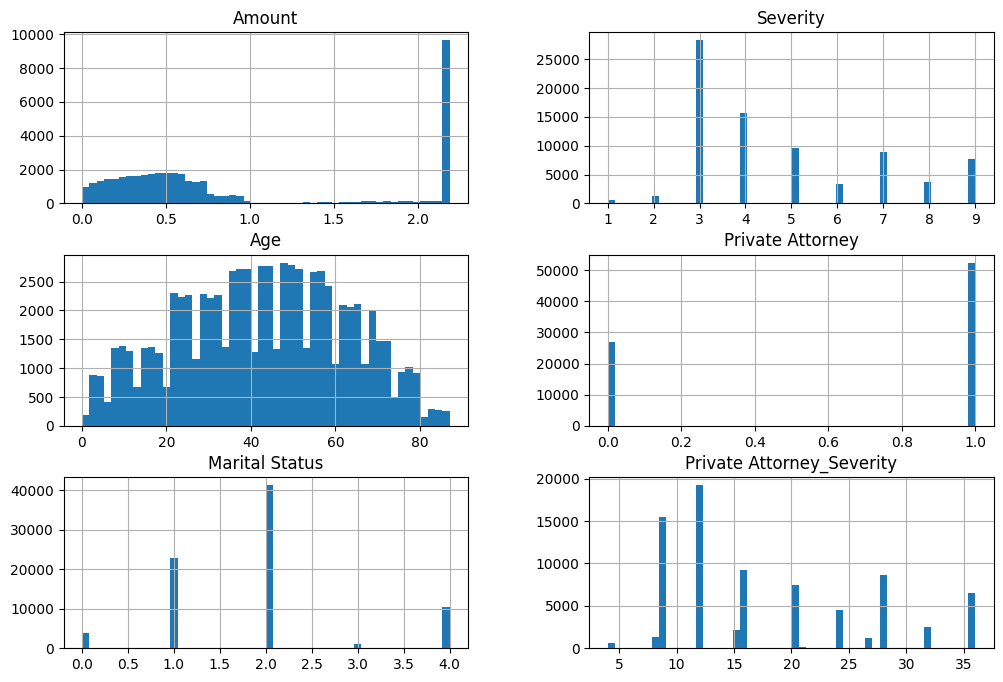

In [10]:
df_filtered.hist(bins =50 ,figsize=(12,8))
plt.show()




Data Pre-Processing

In [11]:

df_filtered.head()

#getting correlation matrix
print(df_filtered.dtypes)



Amount                       float64
Severity                       int64
Age                            int64
Private Attorney               int64
Marital Status                 int64
Specialty                     object
Insurance                     object
Gender                        object
Private Attorney_Severity      int64
dtype: object


Incoding Categorical Features

In [12]:

# Find the most frequent category
most_frequent = df_filtered['Insurance'].mode()[0]
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
print(dataset.head())

df_filtered['Gender'] = label_encoder.fit_transform(df_filtered['Gender'])
#df_filtered['Specialty']=label_encoder.fit_transform(df_filtered['Specialty'])
df_filtered['Marital Status']=label_encoder.fit_transform(df_filtered['Marital Status'])

# Target Encoding
#Calculate the mean target value (Amount) for each category in Specialty
specialty_means = df_filtered.groupby('Specialty')['Amount'].mean()

# Map these means to the Specialty column

df_filtered['Specialty'] = df_filtered['Specialty'].map(specialty_means)

# Handle missing values (if any category in test set doesn't exist in train set)
#df_filtered['Specialty'].fillna(df_filtered['Amount'].mean(), inplace=True)


df_filtered.head()



     Amount  Severity  Age  Private Attorney  Marital Status        Specialty  \
0       NaN         7   62                 1               2  Family Practice   
1  1.835814         6   38                 1               2            OBGYN   
2  0.395308         4   34                 1               2       Cardiology   
3  2.190914         7   42                 1               1       Pediatrics   
4  0.911531         3   60                 0               2            OBGYN   

           Insurance  Gender  Private Attorney_Severity  
0            Private    Male                         28  
1       No Insurance  Female                         24  
2            Unknown    Male                         16  
3       No Insurance  Female                         28  
4  Medicare/Medicaid  Female                          9  


,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender,Private Attorney_Severity
0,NaN,7,62,1,2,1.102092,Private,1,28
1,1.835814,6,38,1,2,1.139964,No Insurance,0,24
2,0.395308,4,34,1,2,0.390776,Unknown,1,16
3,2.190914,7,42,1,1,1.572172,No Insurance,0,28
4,0.911531,3,60,0,2,1.139964,Medicare/Medicaid,0,9


In [13]:


from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'dataset' is your original dataframe

# # Initialize the OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid the dummy variable trap

# # Reshape the 'Specialty' column to a 2D array (necessary for sklearn)
# specialty_encoded = encoder.fit_transform(df_filtered[['Specialty']])

# # Convert the encoded array into a DataFrame with column names as the unique values in 'Specialty'
# encoded_df = pd.DataFrame(specialty_encoded, columns=encoder.get_feature_names_out(['Specialty']))

# # Concatenate the encoded columns with the original dataset (excluding the original 'Specialty' column)
# df_encoded = pd.concat([df_filtered.drop('Specialty', axis=1), encoded_df], axis=1)

# # Checking the first few rows of the updated dataset
# # df_encoded.head()
# #df_encoded.dropna(subset=['Amount'], inplace=True)
# #df_encoded['Amount'].fillna(df_encoded['Amount'].mean(), inplace=True)
df_encoded=df_filtered.copy()
df_encoded.head()



,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender,Private Attorney_Severity
0,NaN,7,62,1,2,1.102092,Private,1,28
1,1.835814,6,38,1,2,1.139964,No Insurance,0,24
2,0.395308,4,34,1,2,0.390776,Unknown,1,16
3,2.190914,7,42,1,1,1.572172,No Insurance,0,28
4,0.911531,3,60,0,2,1.139964,Medicare/Medicaid,0,9


In [14]:
# Encoding Insurance column
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the Insurance column
encoded_data = encoder.fit_transform(df_encoded[['Insurance']])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Insurance']))

# Concatenate the encoded DataFrame with the existing df_encoded (which already contains Specialty encoding)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

# Drop the original Insurance column
df_encoded.drop('Insurance', axis=1, inplace=True)

# Checking the first few rows
print(df_encoded.shape)
df_encoded.info()
from sklearn.preprocessing import StandardScaler
features_to_scale = ['Age','Specialty']
scaler = StandardScaler()
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

df_encoded.head()

(79210, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79210 entries, 0 to 79209
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount                          39605 non-null  float64
 1   Severity                        79210 non-null  int64  
 2   Age                             79210 non-null  int64  
 3   Private Attorney                79210 non-null  int64  
 4   Marital Status                  79210 non-null  int64  
 5   Specialty                       79210 non-null  float64
 6   Gender                          79210 non-null  int64  
 7   Private Attorney_Severity       79210 non-null  int64  
 8   Insurance_Medicare/Medicaid     79210 non-null  float64
 9   Insurance_No Insurance          79210 non-null  float64
 10  Insurance_Private               79210 non-null  float64
 11  Insurance_Unknown               79210 non-null  float64
 12  Insurance_Workers Co

,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Gender,Private Attorney_Severity,Insurance_Medicare/Medicaid,Insurance_No Insurance,Insurance_Private,Insurance_Unknown,Insurance_Workers Compensation
0,NaN,7,0.974115,1,2,0.786403,1,28,0.0,0.0,1.0,0.0,0.0
1,1.835814,6,-0.237337,1,2,0.903143,0,24,0.0,1.0,0.0,0.0,0.0
2,0.395308,4,-0.439246,1,2,-1.406223,1,16,0.0,0.0,0.0,1.0,0.0
3,2.190914,7,-0.035428,1,1,2.235420,0,28,0.0,1.0,0.0,0.0,0.0
4,0.911531,3,0.873161,0,2,0.903143,0,9,1.0,0.0,0.0,0.0,0.0


Splitting Features and Target


In [15]:
df_encoded.dropna(subset=['Amount'], inplace=True)
df_encoded['Amount'].fillna(df_encoded['Amount'].mean(), inplace=True)

C:\Users\Gigabyte\AppData\Local\Temp\ipykernel_15224\1910219017.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['Amount'].fillna(df_encoded['Amount'].mean(), inplace=True)


Splitting the data into Training Data & Testing Data

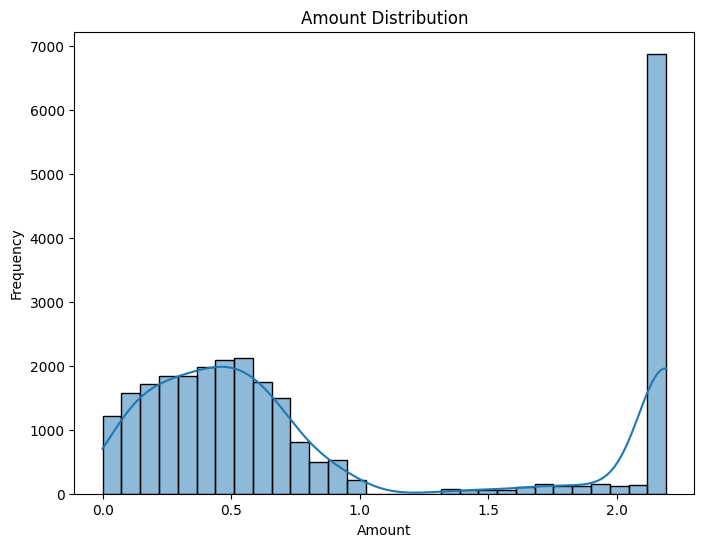

In [16]:

X = df_encoded.drop('Amount', axis=1)
y = df_encoded['Amount']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3 , random_state=101)
# from sklearn.model_selection import StratifiedShuffleSplit

# # Assuming 'Severity' is a categorical feature in X
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# for train_index, test_index in sss.split(X, X['Severity']):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]


plt.figure(figsize=(8, 6))
sns.histplot(Y_train, kde=True, bins=30)  
plt.title("Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

(39605, 12) (27723, 12) (11882, 12)


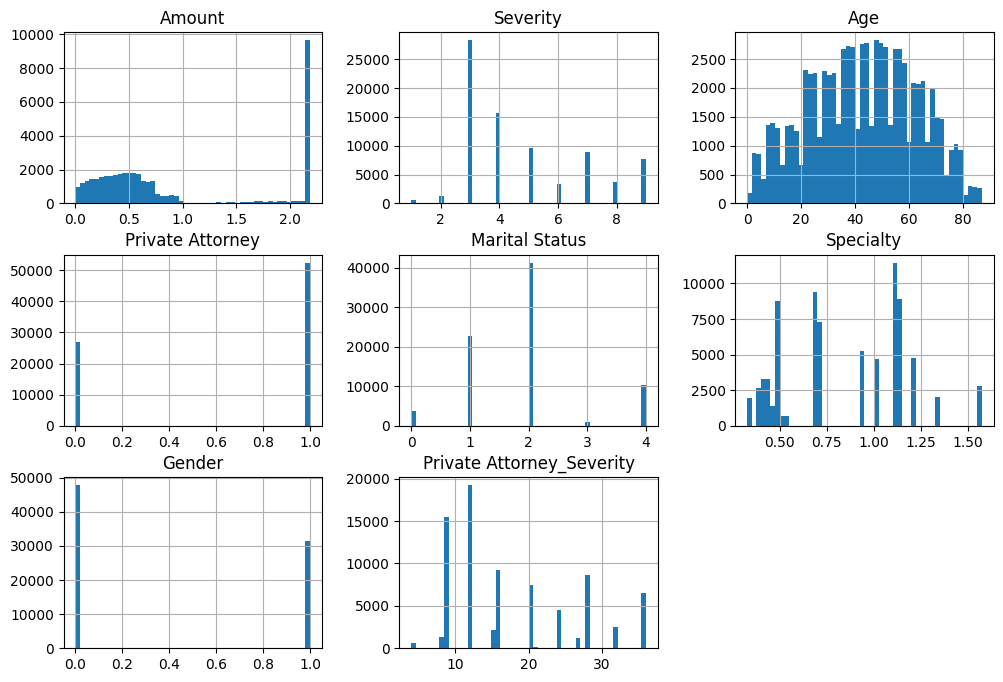

In [17]:
print(X.shape,X_train.shape,X_test.shape)
df_filtered.hist(bins =50 ,figsize=(12,8))
plt.show()





Model Training

In [18]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=6)  # You can change the degree as needed
# X_poly_train = poly.fit_transform(X_train)
# X_poly_test = poly.transform(X_test)
df_encoded['Specialty_Severity'] = df_encoded['Specialty']*df_encoded['Severity']

In [19]:
# from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler()
# X_poly_train_scaled = scaler.fit_transform(X_poly_train)
# X_poly_test_scaled = scaler.transform(X_poly_test)


In [20]:
# poly_regressor = RandomForestRegressor()
# poly_regressor.fit(X_train, Y_train)
print(Y_train.isnull().sum())  # Check for NaN values
X_train.head()
X_train.info()

0
<class 'pandas.core.frame.DataFrame'>
Index: 27723 entries, 13037 to 36079
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Severity                        27723 non-null  int64  
 1   Age                             27723 non-null  float64
 2   Private Attorney                27723 non-null  int64  
 3   Marital Status                  27723 non-null  int64  
 4   Specialty                       27723 non-null  float64
 5   Gender                          27723 non-null  int64  
 6   Private Attorney_Severity       27723 non-null  int64  
 7   Insurance_Medicare/Medicaid     27723 non-null  float64
 8   Insurance_No Insurance          27723 non-null  float64
 9   Insurance_Private               27723 non-null  float64
 10  Insurance_Unknown               27723 non-null  float64
 11  Insurance_Workers Compensation  27723 non-null  float64
dtypes: float64(7), int64(5)
memory 

In [21]:
# #Applying RandomForest Regressor to fit the data
# best_model = RandomForestRegressor(bootstrap=True,n_estimators=271,max_depth=13,min_samples_leaf=1,min_samples_split=18)
# best_model.fit(X_train, Y_train)


XGB Regressor Fitting

In [22]:
# linear_model =XGBRegressor(base_score=None, booster=None, callbacks=None,
#               colsample_bylevel=None, colsample_bynode=None,
#               colsample_bytree=0.85, device=None, early_stopping_rounds=None,
#               enable_categorical=False, eval_metric=None, feature_types=None,
#               gamma=None, grow_policy=None, importance_type=None,
#               interaction_constraints=None, learning_rate=0.01, max_bin=None,
#              max_cat_threshold=None, max_cat_to_onehot=None,
#               max_delta_step=None, max_depth=9, max_leaves=None,
#               min_child_weight=None, monotone_constraints=None,
#               multi_strategy=None, n_estimators=350, n_jobs=None,
#              num_parallel_tree=None, random_state=42)


best_params = {
    'colsample_bytree': 1,
    'gamma': 0.32,
    'learning_rate': 0.012,
    'max_depth': 10,
    'min_child_weight': 1,
    'n_estimators': 494,
    'subsample': 0.85
}

# Initialize the model with the best parameters
best_model = XGBRegressor(**best_params, random_state=101)

# Train the model
best_model.fit(X_train, Y_train)




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.32, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.012, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=494,
             n_jobs=None, num_parallel_tree=None, random_state=101, ...)

Model Evaluation

In [23]:
training_data_prediction = best_model.predict(X_train)
test_data_prediction = best_model.predict(X_test)


In [24]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error, r2_score
r2_train = r2_score(Y_train, training_data_prediction)
r2_test = r2_score(Y_test, test_data_prediction)
print('R squared value (Train): ', r2_train)
print('R squared value (Test): ', r2_test)
print("Mean Absolute Error: " + str(mean_absolute_error(test_data_prediction,Y_test)))


R squared value (Train):  0.7934536589112549
R squared value (Test):  0.7638323449154735
Mean Absolute Error: 0.26546785354861707


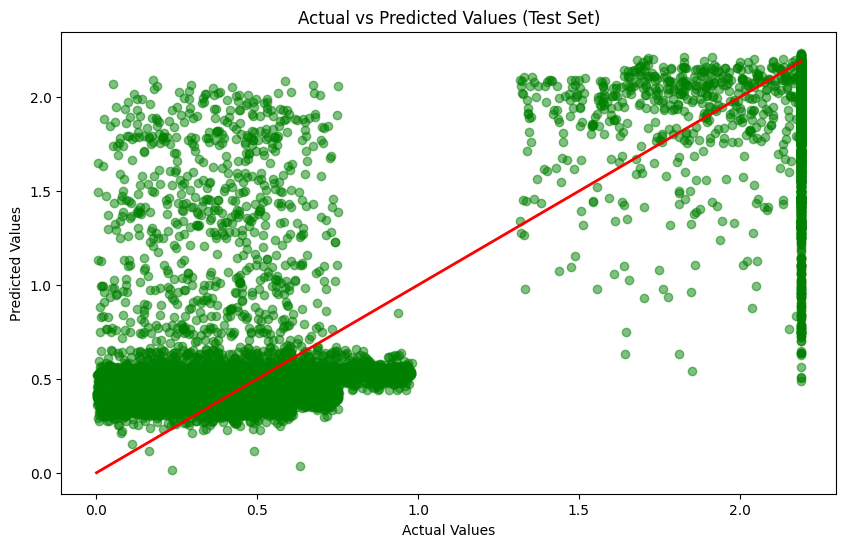

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_data_prediction, color='green', alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()


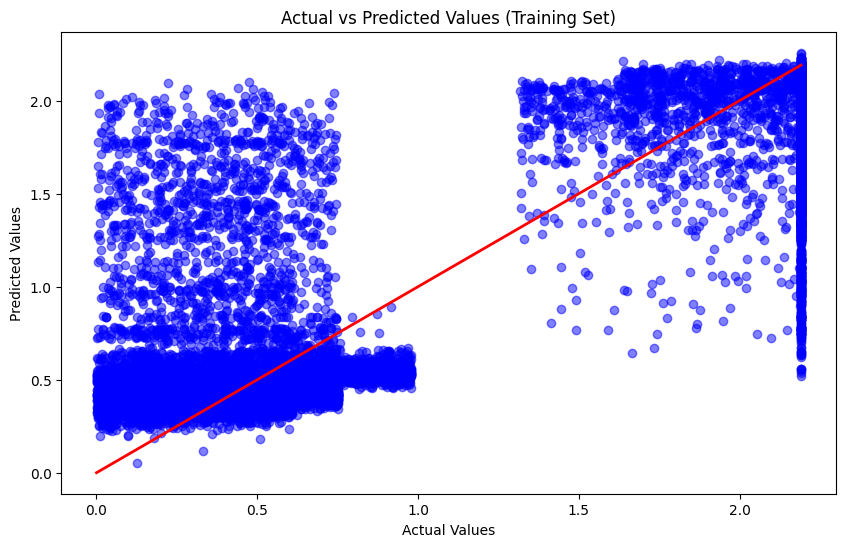

In [26]:
# Assuming Y_train and training_data_prediction are your actual and predicted values for the training set
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, training_data_prediction, color='blue', alpha=0.5)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Training Set)')
plt.show()


<Axes: ylabel='Specialty'>

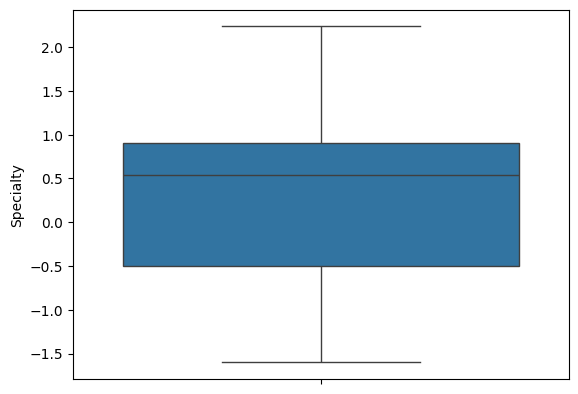

In [27]:
sns.boxplot(df_encoded['Specialty'])
